<a href="https://colab.research.google.com/github/hannahabele/Assignment-1/blob/main/DS_3001_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS 3001 Final Project: Assessing Stroke Risk

## Written Analysis

**1. What is in your data?**

https://www.kaggle.com/datasets/mahatiratusher/stroke-risk-prediction-dataset
Our dataset examines key risk factors that contribute to a person’s likelihood of experiencing a stroke. The studied variables include chest pain, shortness of breath, irregular heartbeat, fatigue, dizziness, swelling (edema), pain in the neck/jaw/shoulder/back, excessive sweating, persistent cough, and nausea/vomiting. These factors were selected through analysis of leading medical authorities such as the American Stroke Association, Mayo Clinic, Cleveland Clinic, Harrison’s Principles of Internal Medicine, Stroke Prevention, Treatment, and Rehabilitation, The Stroke Book, and the World Health Organization. Each of the 7000 records represents an individual’s medical symptoms and risk assessment, with binary indicators (1 = symptom present, 0 = symptom absent). Age is also included as a critical factor, given that an increase in age is strongly associated with a heightened risk of stroke.



**2. How will these data be useful for studying the phenomenon you're interested in?**

According to UTMB health, stroke is the fifth leading cause of death for US citizens, and is a prominent cause of long-term disability [1]. Since stroke is such a prevalent cause of health issues in the US, the phenomenon we are interested in is calculating the risk of stroke based on the presence or absence of the following symptoms: chest pain, shortness of breath, irregular heartbeat, fatigue and weakness, dizziness, swelling (edema), pain in neck/shoulder/back, excessive sweating, persistent cough, nausea/vomiting, high blood pressure, chest discomfort (activity), cold hands/feet, snoring/sleep apnea, anxiety/feeling of doom, and age. Stroke symptoms are often overlooked or attributed to other health issues, leading to delayed diagnosis, inadequate preventative measures, and increased risk of severe complications or fatal outcomes [2]. According to the CDC, stroke prevalence has increased by 15.7% for adults aged 45 to 64 and 14.6% for adults aged 18 to 44 from 2011 to 2023 [3]. As the age of onset for strokes is becoming younger and younger over time, this study becomes increasingly relevant to American health. This dataset will be useful for examining the risk of stroke by age group, the risk factors that are majorly present in the American population, and the correlation between each risk factor and the overall risk of stroke, which enables us to determine which risk factor is most correlated with incidence of stroke. Through this analysis, we hope to identify a better way to quantify the risk of stroke, enhance our understanding of its causes, and perhaps provide insight into ways we can better combat it.



**3. What are the challenges you've resolved or expect to face in using them?**

There are several challenges that we have resolved when cleaning our data. All the variables initially presented as “0,1.” First, we changed that to “Y,N” in order to more easily interpret our variables (as the “0,1” represented “Y,N”). This will make it easier to analyze our data in the future. Next, we needed to ensure that the code was able to create a “count” for the binary variables, so that we are able to perform analysis such as calculating percentages of the symptoms likelihood to impact having a stroke.
We anticipate several future challenges. First, we may need to alter the “age” variable when creating visualizations and descriptions, as it is currently an integer (float variable), while all other variables are binary variables. We may need to change the “age” variable to a string if needed. Second, we anticipate that several of the variables will overlap. For example, the variable “anxiety and feeling of doom” may closely relate to the variable “increased heart rate” or “high blood pressure,” as anxiety causes tension, sweating, increased blood pressure, and increased heart rate. During our analysis, it may be difficult to discern which variables independently contribute to increasing the likelihood of having a stroke.

#### References

* [1]: https://www.utmbhealth.com/services/neurology/procedures-conditions/stroke/stroke-facts

* [2:] https://www.penningtonslaw.com/news-publications/latest-news/2023/the-consequences-of-a-delayed-or-missed-diagnosis-of-a-stroke#:~:text=If%20there%20is%20a%20delay,speech%2C%20mobility%20and%20personality%20changes.

* [3]: https://healthmatters.nyp.org/what-to-know-about-the-rising-stroke-rates-in-younger-people/#:~:text=The%20rates%20of%20stroke%20are,Joshua%20Willey

In [9]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# load in data
df = pd.read_csv('https://raw.githubusercontent.com/kpunsalan8/DS-3001-Final-Project/refs/heads/main/stroke_risk_dataset.csv',low_memory=False)

In [11]:
df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


In [12]:
df['Chest Pain'] = df['Chest Pain'].map({0: 'N', 1: 'Y'})
print(df['Chest Pain'])

0        N
1        N
2        Y
3        Y
4        N
        ..
69995    Y
69996    N
69997    Y
69998    N
69999    N
Name: Chest Pain, Length: 70000, dtype: object


In [13]:
df['Shortness of Breath'] = df['Shortness of Breath'].map({0: 'N', 1: 'Y'})
print(df['Shortness of Breath'])

0        Y
1        N
2        N
3        N
4        N
        ..
69995    N
69996    N
69997    Y
69998    Y
69999    Y
Name: Shortness of Breath, Length: 70000, dtype: object


In [14]:
df['Irregular Heartbeat'] = df['Irregular Heartbeat'].map({0: 'N', 1: 'Y'})
print(df['Irregular Heartbeat'])

0        Y
1        Y
2        N
3        Y
4        Y
        ..
69995    N
69996    N
69997    N
69998    Y
69999    N
Name: Irregular Heartbeat, Length: 70000, dtype: object


In [15]:
df['Fatigue & Weakness'] = df['Fatigue & Weakness'].map({0: 'N', 1: 'Y'})
print(df['Fatigue & Weakness'])

0        Y
1        N
2        Y
3        Y
4        N
        ..
69995    N
69996    Y
69997    Y
69998    Y
69999    N
Name: Fatigue & Weakness, Length: 70000, dtype: object


In [16]:
df['Dizziness'] = df['Dizziness'].map({0: 'N', 1: 'Y'})
print(df['Dizziness'])

0        N
1        N
2        Y
3        N
4        N
        ..
69995    N
69996    N
69997    Y
69998    Y
69999    N
Name: Dizziness, Length: 70000, dtype: object


In [17]:
df['Swelling (Edema)'] = df['Swelling (Edema)'].map({0: 'N', 1: 'Y'})
print(df['Swelling (Edema)'])

0        N
1        Y
2        Y
3        Y
4        Y
        ..
69995    N
69996    Y
69997    Y
69998    N
69999    N
Name: Swelling (Edema), Length: 70000, dtype: object


In [18]:
df['Pain in Neck/Jaw/Shoulder/Back'] = df['Pain in Neck/Jaw/Shoulder/Back'].map({0: 'N', 1: 'Y'})
print(df['Pain in Neck/Jaw/Shoulder/Back'])

0        N
1        N
2        N
3        Y
4        N
        ..
69995    N
69996    N
69997    N
69998    N
69999    N
Name: Pain in Neck/Jaw/Shoulder/Back, Length: 70000, dtype: object


In [19]:
df['Excessive Sweating'] = df['Excessive Sweating'].map({0: 'N', 1: 'Y'})
print(df['Excessive Sweating'])

0        Y
1        N
2        N
3        Y
4        Y
        ..
69995    Y
69996    Y
69997    N
69998    N
69999    Y
Name: Excessive Sweating, Length: 70000, dtype: object


In [20]:
df['Persistent Cough'] = df['Persistent Cough'].map({0: 'N', 1: 'Y'})
print(df['Persistent Cough'])

0        Y
1        N
2        Y
3        Y
4        N
        ..
69995    N
69996    N
69997    N
69998    N
69999    Y
Name: Persistent Cough, Length: 70000, dtype: object


In [21]:
df['Nausea/Vomiting'] = df['Nausea/Vomiting'].map({0: 'N', 1: 'Y'})
print(df['Nausea/Vomiting'])

0        Y
1        N
2        N
3        Y
4        Y
        ..
69995    Y
69996    N
69997    N
69998    N
69999    Y
Name: Nausea/Vomiting, Length: 70000, dtype: object


In [22]:
df['High Blood Pressure'] = df['High Blood Pressure'].map({0: 'N', 1: 'Y'})
print(df['High Blood Pressure'])

0        N
1        Y
2        N
3        Y
4        Y
        ..
69995    Y
69996    N
69997    Y
69998    N
69999    Y
Name: High Blood Pressure, Length: 70000, dtype: object


In [23]:
df['Chest Discomfort (Activity)'] = df['Chest Discomfort (Activity)'].map({0: 'N', 1: 'Y'})
print(df['Chest Discomfort (Activity)'])

0        Y
1        N
2        N
3        N
4        N
        ..
69995    Y
69996    Y
69997    N
69998    Y
69999    Y
Name: Chest Discomfort (Activity), Length: 70000, dtype: object


In [24]:
df['Cold Hands/Feet'] = df['Cold Hands/Feet'].map({0: 'N', 1: 'Y'})
print(df['Cold Hands/Feet'])

0        Y
1        Y
2        N
3        N
4        N
        ..
69995    N
69996    Y
69997    N
69998    Y
69999    N
Name: Cold Hands/Feet, Length: 70000, dtype: object


In [25]:
df['Snoring/Sleep Apnea'] = df['Snoring/Sleep Apnea'].map({0: 'N', 1: 'Y'})
print(df['Snoring/Sleep Apnea'])

0        N
1        Y
2        Y
3        N
4        Y
        ..
69995    N
69996    Y
69997    N
69998    Y
69999    Y
Name: Snoring/Sleep Apnea, Length: 70000, dtype: object


In [26]:
df['Anxiety/Feeling of Doom'] = df['Anxiety/Feeling of Doom'].map({0: 'N', 1: 'Y'})
print(df['Anxiety/Feeling of Doom'])

0        N
1        N
2        N
3        N
4        Y
        ..
69995    Y
69996    N
69997    N
69998    N
69999    N
Name: Anxiety/Feeling of Doom, Length: 70000, dtype: object


In [27]:
df['At Risk (Binary)'] = df['At Risk (Binary)'].map({0: 'N', 1: 'Y'})
print(df['At Risk (Binary)'])

0        Y
1        N
2        Y
3        Y
4        Y
        ..
69995    N
69996    N
69997    N
69998    N
69999    Y
Name: At Risk (Binary), Length: 70000, dtype: object


In [28]:
#Describe Age Column
df['Age'].describe()

,Age
count,70000.000000
mean,54.056429
std,21.071567
min,18.000000
25%,36.000000
50%,54.000000
75%,72.000000
max,90.000000


In [29]:
#Crosstabulate Age and Stroke Risk
pd.crosstab(df['Age'],df['At Risk (Binary)'])

At Risk (Binary),N,Y
Age,,
18,782,143
19,814,161
20,795,138
21,779,172
22,775,117
...,...,...
86,18,934
87,15,936
88,3,1015


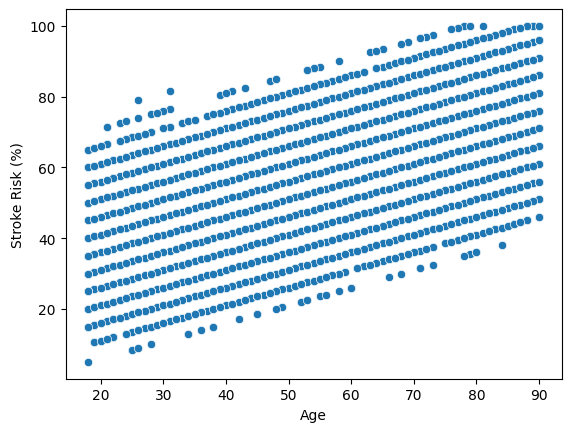

In [32]:
#Scatterplot of Age and Stroke Risk
sns.scatterplot(data=df,x='Age',y='Stroke Risk (%)')
plt.show()